In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

##### Загрузка данных

In [2]:
DATA_PATH = os.path.join("..", "data", "raw" , "heart.csv")

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f"Размер датасета: {df.shape}")

Размер датасета: (303, 14)


In [5]:
df.agg(['unique']).transpose()

,unique
age,"[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5..."
sex,"[1, 0]"
cp,"[3, 2, 1, 0]"
trestbps,"[145, 130, 120, 140, 172, 150, 110, 135, 160, ..."
chol,"[233, 250, 204, 236, 354, 192, 294, 263, 199, ..."
fbs,"[1, 0]"
restecg,"[0, 1, 2]"
thalach,"[150, 187, 172, 178, 163, 148, 153, 173, 162, ..."
exang,"[0, 1]"
oldpeak,"[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ..."


In [6]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numerical_features =["age", "trestbps", "chol", "thalach", "oldpeak"]
target_col = "target"

##### categorical_features

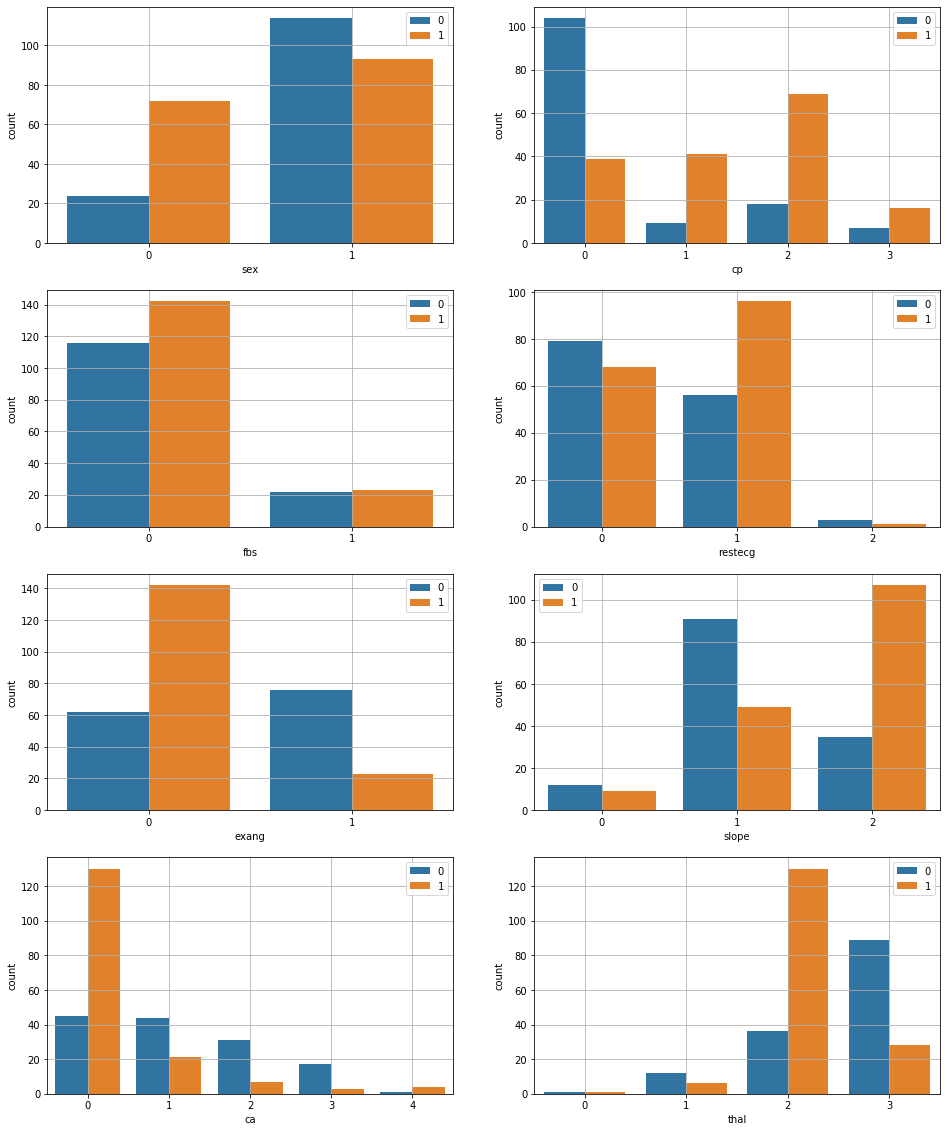

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))

for idx, feat in  enumerate(categorical_features):
    sns.countplot(x=df[feat], hue=df['target'], ax=axes[idx // 2, idx % 2])
    axes[idx // 2, idx % 2].legend()
    axes[idx // 2, idx % 2].grid()

In [8]:
df[categorical_features].agg(['unique']).transpose()

,unique
sex,"[1, 0]"
cp,"[3, 2, 1, 0]"
fbs,"[1, 0]"
restecg,"[0, 1, 2]"
exang,"[0, 1]"
slope,"[0, 2, 1]"
ca,"[0, 2, 1, 3, 4]"
thal,"[1, 2, 3, 0]"


##### numerical_features

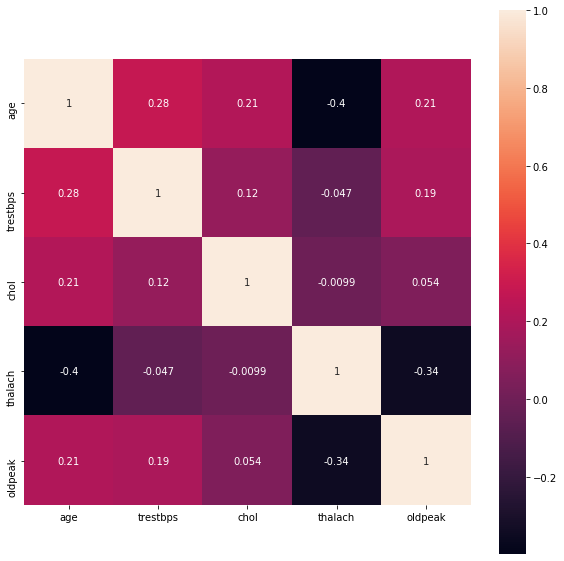

In [9]:
plt.figure(figsize=(10, 10))

sns.heatmap(df[numerical_features].corr(), square=True, annot=True);

<Figure size 720x720 with 0 Axes>

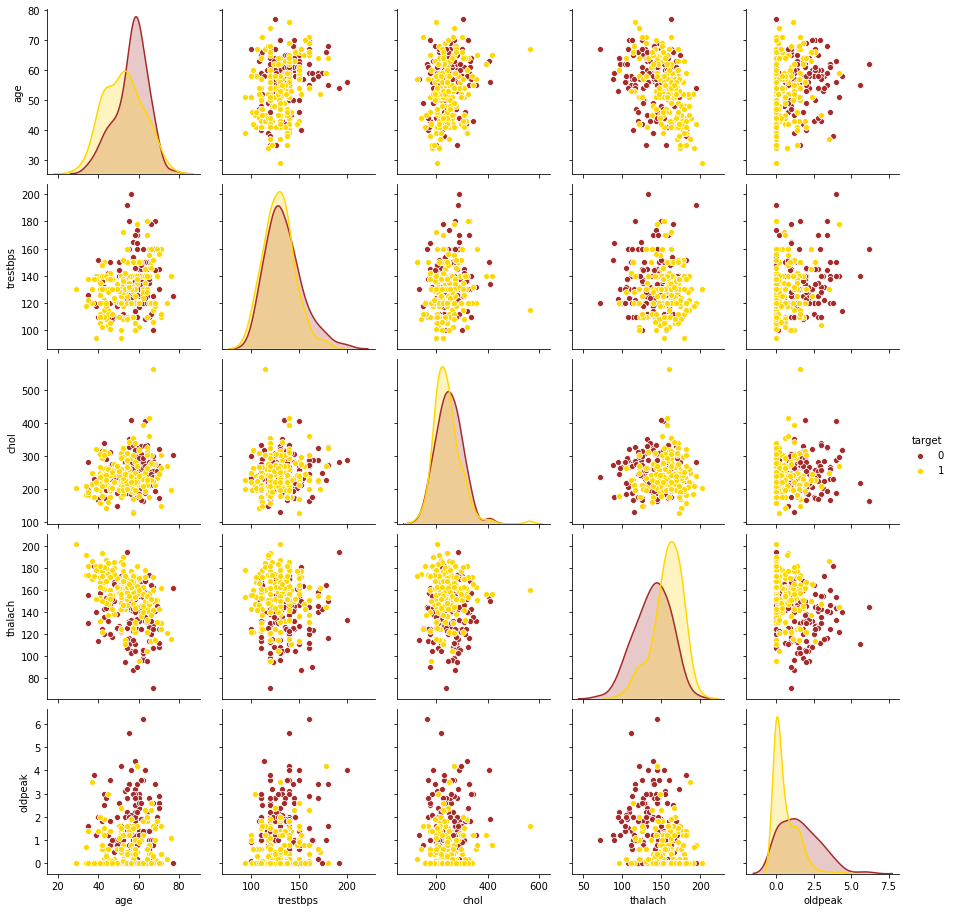

In [10]:
plt.figure(figsize=(10, 10))
numerical_features_with_target = numerical_features
numerical_features_with_target.append(target_col)
sns_plot = sns.pairplot(df[numerical_features_with_target], hue=target_col, palette = ['brown', 'gold'])

In [11]:
df[numerical_features].agg([np.min, np.max])

,age,trestbps,chol,thalach,oldpeak,target
amin,29,94,126,71,0.0,0
amax,77,200,564,202,6.2,1
